# Introduction

Customer Personality Analysis (CPA) is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

CPA helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

In this analysis, we will analyze the Marketing campaign survey dataset. The dataset contains responses of selected customers. You can find the raw data & official analysis here: https://www.kaggle.com/imakash3011/customer-personality-analysis. The analysis will be done as folllows:

* Import necessary packages: we will need to import all neccaesary packages useful for the analyses.
* Read the Dataset: we will read the data set to this jupyter notebook
* Variable Definition: we will define all variables in the dataset
* Processing and cleaning data: we will investigate the data and create a dataframe that will help us achieve the objective of this analysis. Also, we will clean the dataframe to make it fit for the analyses
* Manipulate data: we will then manipulate the data to extract dataset or series to answer some specific questions that will help us achieve the analyses objectives.
* Visualize data: For better understanding of the data, hence, we plot some figures to explain our results.
* Summary: we summarize and conclude our results.

## Import Necessary Packages

In [1]:
import pandas as pd   #to read data

# packages for visualization 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#this will enable the graph to show in jupyter only
%matplotlib inline

# some settings for the graph 
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
# read the file from the existing directory.
customer_df = pd.read_csv("marketing_campaign.csv", delimiter = "\t")

Marketing_campaign dataset has beeen uploaded to the existing directory. The file is not seperated by comma (,) so we have to input the delimiter argument to read the file properly, otherwise the file will not read out as expected. "\t" means escape tab. The file was loaded by seperating values with tab and not comma.

In [4]:
customer_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


The dataset consist of  2240 rows and 29 coulmns. We inspect the content of the dataset in order to understand what it entails.

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From the analysis given above, the dataset consists of 1 float type column, 25 int type coulmns and 3 object type coulmns. 

Let us define the variables in the dataset. Then we can adjust the column type to suit the analysis.

# Variable Description

The dataset consist of 29 columns of customers responses. This consists of different factors of marketing, which are: people, products, promotion and place. In marketing we have the 4P's(we have other factors but these are the main factors) that demostrate customer personalities, this helps to develop marketeing strategies to target customers, which will be our objective for this analysis.

**People**
1. ID: Customer's unique identifier
2. Year_Birth: Customer's birth year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household9
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

11. MntWines: Amount spent on wine in last 2 years
12. MntFruits: Amount spent on fruits in last 2 years
13. MntMeatProducts: Amount spent on meat in last 2 years
14. MntFishProducts: Amount spent on fish in last 2 years
15. MntSweetProducts: Amount spent on sweets in last 2 years
16. MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

17. NumDealsPurchases: Number of purchases made with a discount
18. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
19. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
20. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
21. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
22. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
23. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

24. NumWebPurchases: Number of purchases made through the company’s website
25. NumCatalogPurchases: Number of purchases made using a catalogue
26. NumStorePurchases: Number of purchases made directly in stores
27. NumWebVisitsMonth: Number of visits to company’s website in the last month

# Processing and Cleaning Data

In [6]:
# check statistics summary of the data
customer_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
# Check if there are no missing values
customer_df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Income has 24 missing values. Let's drop those rows since they are not significant

In [8]:
# drop the rows with missing values
customer_df.dropna(inplace = True)

In [9]:
# Check if there are no duplicate rows
customer_df.duplicated().sum()

0

In [10]:
# check the unique values of the columns
customer_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

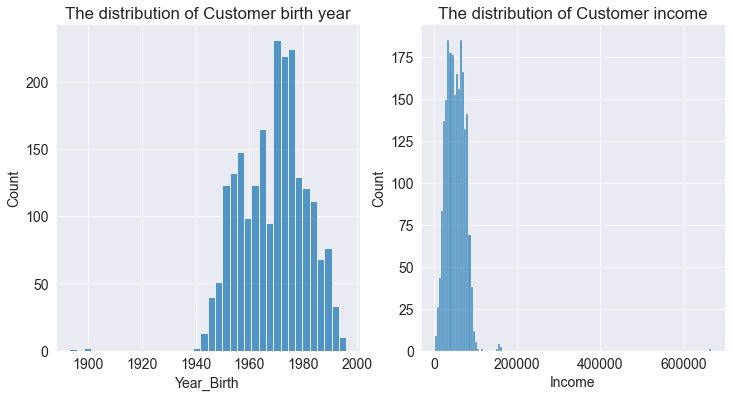

In [11]:
# draw a histogram graph to see the consistency and distribution of income and year_birth.
fig, ax = plt.subplots(1, 2, figsize = (12,6))
sns.histplot(customer_df.Year_Birth, ax =ax[0])
sns.histplot(customer_df.Income, ax = ax[1])
ax[0].set_title("The distribution of Customer birth year")
ax[1].set_title("The distribution of Customer income");

There are some outrageous value in age and income variable. We locate these rows and modify them. 

In [12]:
customer_df.Year_Birth.sort_values(ascending = True).head(10)

239     1893
339     1899
192     1900
1950    1940
424     1941
1923    1943
415     1943
1150    1943
894     1943
358     1943
Name: Year_Birth, dtype: int64

In [13]:
customer_df.Income.sort_values(ascending = False).head(10)

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
1898    113734.0
646     105471.0
Name: Income, dtype: float64

From the ouput above, it is discovered that the income at index 2233 is ourageous, also, year_birth of index 239,339 and 192 are outrageous,we can drop this rows.

In [14]:
customer_df.drop([192, 239, 339, 2233], inplace = True)

In [15]:
# drop Z_CostContact and Z_Revenue columns since they are not relevant for this analysis because they have a constant value all through.
customer_df.drop(columns = ["Z_CostContact", "Z_Revenue"], inplace = True)

There are some category variables in the dataset, we confirm if we need to set another satisfactory values for them. 

List of Categorical Variables are:
Complain, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, Response, Marital_Status, Education, Kidhome, Teenhome.

In [16]:
customer_df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [17]:
customer_df.Marital_Status.value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

We modify the marital status category. Married and together should be same, also alone,absurd,YOLO, widow and divorce should all be single.

We also change the value of campaigns for better understanding, so we don't have to go through the variable description often.

In [18]:
# create mapping dict that set those values to intended values
marital_map = {"Together":"Married", "Alone":"Single", "Absurd":"Single", "YOLO":"Single", "Divorced":"Single", "Widow":"Single" }
Education_map = {"2n Cycle": "Basic"}
campaign_map ={0: "reject", 1: "accept"}

#set a variable for all the campaign columns
campaign_var = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]

# Replace the marital_status, education and campaign unique values to the mapping values
customer_df.Marital_Status = customer_df.Marital_Status.replace(marital_map)
customer_df.Education = customer_df.Education.replace(Education_map)
customer_df[campaign_var]= customer_df[campaign_var].replace(campaign_map)

We need to add some new columns that will be useful for the analysis to our dataset.

In [19]:
# Customer age
customer_df["Age"] = 2021 - customer_df.Year_Birth

# No. of years customer has been with the company
customer_df["Dt_Customer"] = pd.to_datetime(customer_df.Dt_Customer)
customer_df["Dt_Customer"] = 2021 - customer_df["Dt_Customer"].dt.year

# Total amount spent
customer_df["Total_Amount"] = (customer_df['MntWines'] +
                            customer_df['MntFruits'] + 
                            customer_df['MntMeatProducts'] +
                            customer_df['MntFishProducts'] +
                            customer_df['MntSweetProducts'] +
                            customer_df['MntGoldProds'])

# Ratio of income spent
customer_df["Income_ratio"] = customer_df["Total_Amount"]/ customer_df.Income

# No. of children customer has
customer_df["no_of_children"] = customer_df["Kidhome"] + customer_df["Teenhome"]

#Total time of purchase
customer_df["Total_purchase"] =(customer_df["NumWebPurchases"] +
                                customer_df["NumCatalogPurchases"] +
                                customer_df["NumStorePurchases"])

Now, we recheck our dataset.

In [20]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2212 non-null   int64  
 1   Year_Birth           2212 non-null   int64  
 2   Education            2212 non-null   object 
 3   Marital_Status       2212 non-null   object 
 4   Income               2212 non-null   float64
 5   Kidhome              2212 non-null   int64  
 6   Teenhome             2212 non-null   int64  
 7   Dt_Customer          2212 non-null   int64  
 8   Recency              2212 non-null   int64  
 9   MntWines             2212 non-null   int64  
 10  MntFruits            2212 non-null   int64  
 11  MntMeatProducts      2212 non-null   int64  
 12  MntFishProducts      2212 non-null   int64  
 13  MntSweetProducts     2212 non-null   int64  
 14  MntGoldProds         2212 non-null   int64  
 15  NumDealsPurchases    2212 non-null   i

In [21]:
customer_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Total_Amount,Income_ratio,no_of_children,Total_purchase
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,5585.160940,1968.913653,51958.810579,0.441682,0.505877,7.971971,49.019439,305.287523,26.329566,167.029837,...,4.088156,2.672242,5.806510,5.321429,0.009042,52.086347,607.268083,0.009919,0.947559,12.566908
std,3247.523735,11.701599,21527.278844,0.536955,0.544253,0.685926,28.943121,337.322940,39.744052,224.254493,...,2.742187,2.927542,3.250939,2.425597,0.094678,11.701599,602.513364,0.016826,0.749466,7.205427
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,5.000000,0.000039,0.000000,0.000000
25%,2814.750000,1959.000000,35233.500000,0.000000,0.000000,8.000000,24.000000,24.000000,2.000000,16.000000,...,2.000000,0.000000,3.000000,3.000000,0.000000,44.000000,69.000000,0.002351,0.000000,6.000000
50%,5454.500000,1970.000000,51371.000000,0.000000,0.000000,8.000000,49.000000,175.500000,8.000000,68.000000,...,4.000000,2.000000,5.000000,6.000000,0.000000,51.000000,397.000000,0.008027,1.000000,12.000000
75%,8418.500000,1977.000000,68487.000000,1.000000,1.000000,8.000000,74.000000,505.000000,33.000000,232.250000,...,6.000000,4.000000,8.000000,7.000000,0.000000,62.000000,1048.000000,0.015533,1.000000,18.250000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,9.000000,99.000000,1493.000000,199.000000,1725.000000,...,27.000000,28.000000,13.000000,20.000000,1.000000,81.000000,2525.000000,0.706988,3.000000,32.000000


In [22]:
customer_df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
Total_Amount           0
Income_ratio           0
no_of_children         0
Total_purchase         0
dtype: int64

In [23]:
customer_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_Amount',
       'Income_ratio', 'no_of_children', 'Total_purchase'],
      dtype='object')

In [24]:
#Lets drop redundant columns
redundant_col = ["ID","Year_Birth","Kidhome",'Teenhome']
customer_df.drop(redundant_col, axis = 1, inplace = True)

# Manipulating Data

Next, we filter out infomation needed. Firstly, we check the distribution of the category variables by plotting a countplot for each category and a pie plot to show thier percentage.

In [25]:
def plot_var(col):
    sns.countplot(x= col, data = customer_df)
    plt.title(f'The distribution of {col}')
    plt.show()
    var = customer_df[col].value_counts()
    plt.pie(var, labels = var.index, autopct = '%1.1f%%')
    plt.show()

In [26]:
# define a variable for the category columns
category_var = ["Complain", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp4", "Response", "Marital_Status", "Education", "no_of_children"]

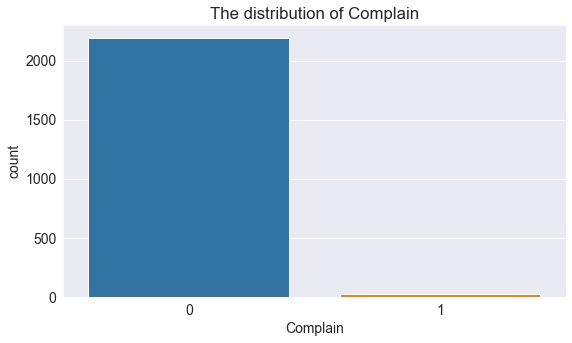

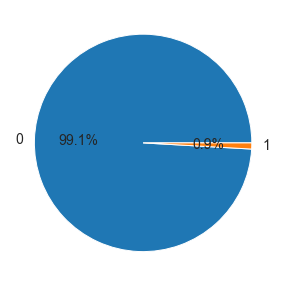

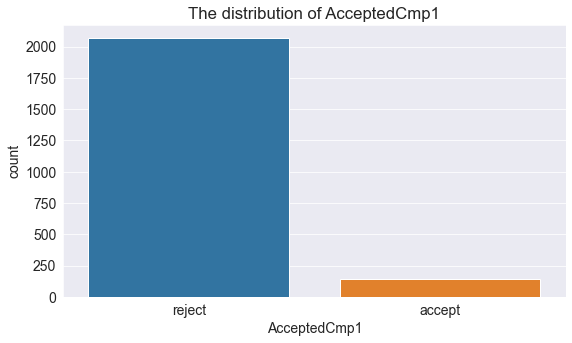

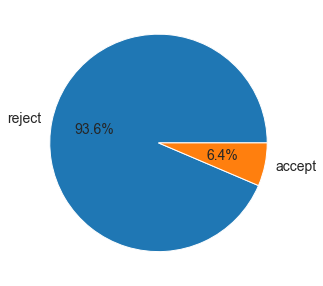

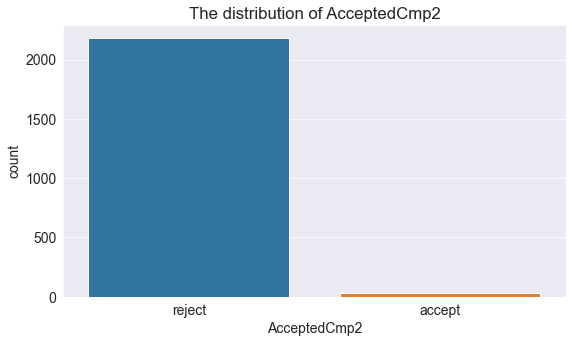

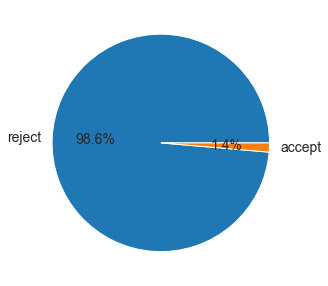

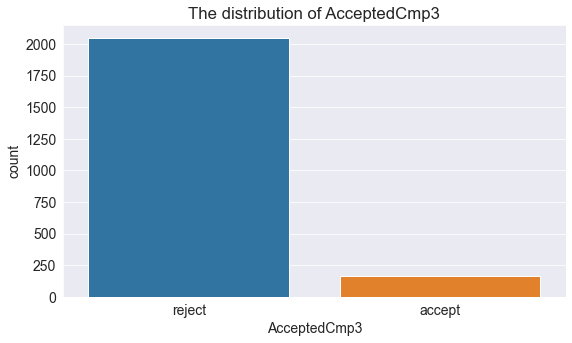

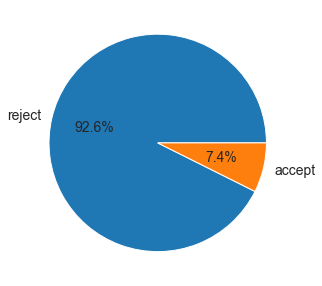

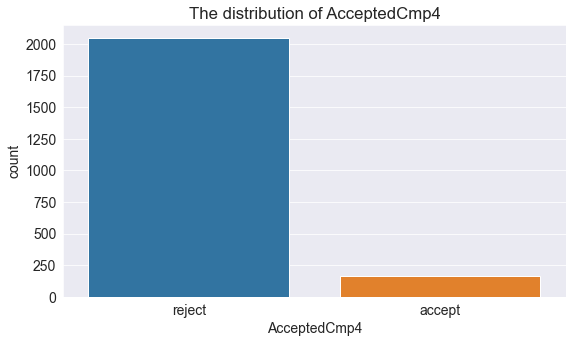

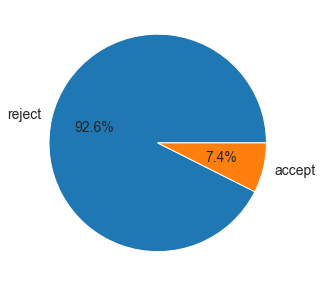

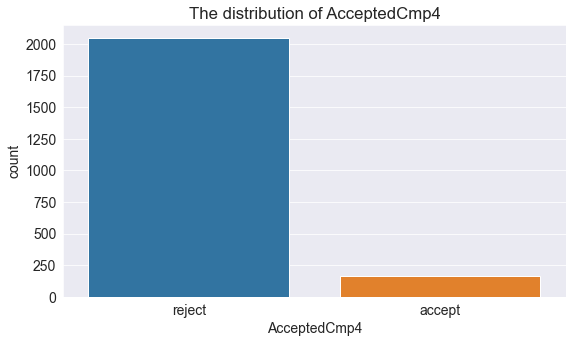

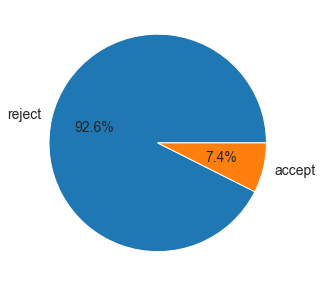

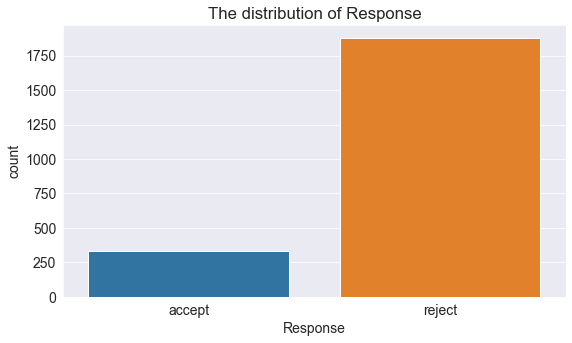

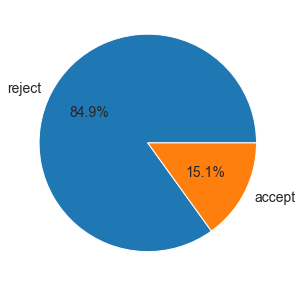

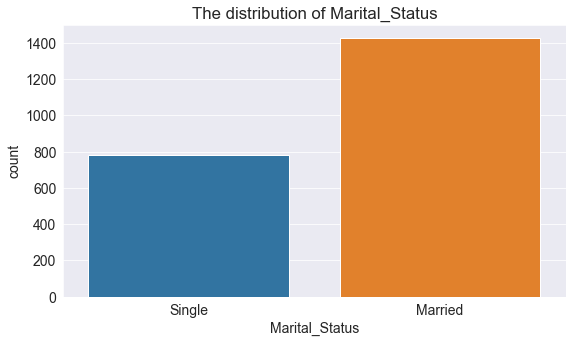

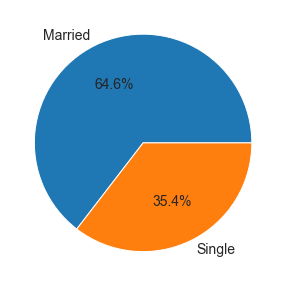

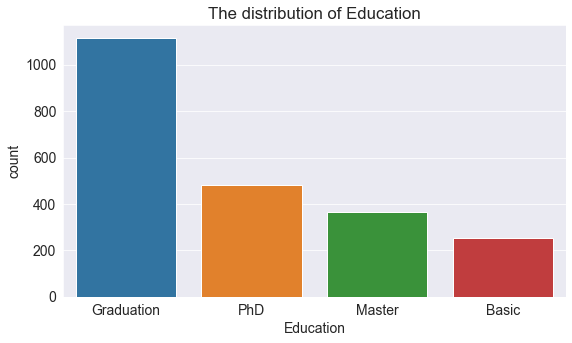

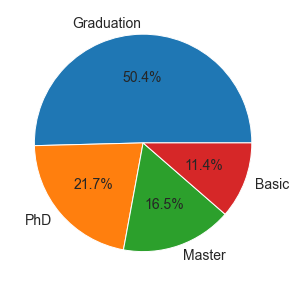

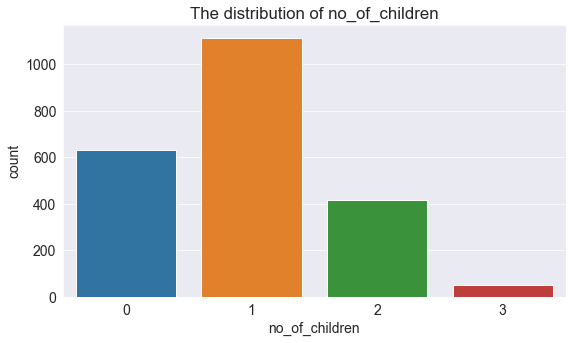

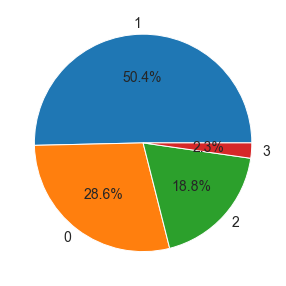

In [27]:
for column in category_var:
    plot_var(column)

#### Comment

From the analysis above, it can be seen that:
* almost all the customers don't complain for the past 2years,the percentage of customers that complain is not up to 1%.
* majority of the customers don't accept the offer in all the campaigns, only 6.4%, 1.4%, 7.4%, 7.4%, 7.4% and 15.1% accepted the offer in each campaign. This shows that the campaign is not productive.
* 64.6% of the customers are married and 35.4% are not married. 
* a large number of the customers are graduate and some even have Ph.D. and Masters. Only few has basic education.
* majority of the customers have children with high percentage having 1 child and just about 29% of the customers don't have any child.

# Questions

**People**

1. Is there any relationship between income and amount spent on products?
2. What category of customers complain the most?
    * in relation to education
    * in relation to marital status
    
**Product**

3. What are the most purchased goods?
    * How does it relate to customers education level?
    * How does it relate to customers marital status?
    * Also, how does this relate with the number of children the customer has?
    
**Place**

4. Where do customers prefer most to get their products?
    * How does this relate to customers education level?
    * How does it relate to customers marital status?
    * Also, how does this relate with the no. of kid/teenager the customer has?

**Promotion**

5. How important is it to do product campaign?

## People
1. Is there a relationship between income and amount spent on products?
2. What category of customers complain the most?
    * in relation to education
    * in relation to marital status

### Income Analysis

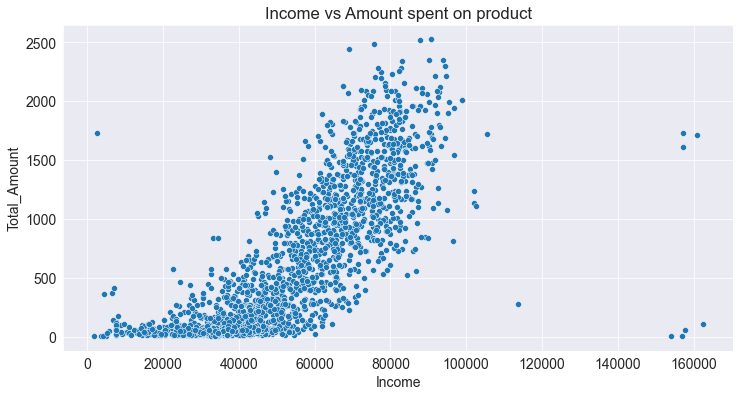

In [28]:
#scatter plot for income and amount spent
plt.figure(figsize = (12,6))
plt.title("Income vs Amount spent on product")
sns.scatterplot(x = "Income", y = "Total_Amount", data = customer_df);

#### Comment
There is a relationship between total amount spent and income earned, although there are variations but the number is minimal.

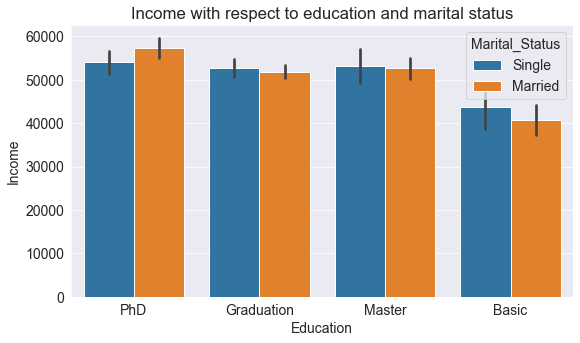

In [29]:
# bar chat for Income w.r.t education and marital status
sns.barplot(x= "Education", y = "Income", hue = "Marital_Status", data = customer_df, order = ["PhD", "Graduation", "Master", "Basic"])
plt.title("Income with respect to education and marital status");

### Complaint Analysis

In [30]:
# variables used for analysing each analysis
sub_var= ["Education", "Marital_Status","no_of_children"]

In [31]:
# function to plot countplot
def count_plot(col, var):
    sns.countplot(x = col, hue = var, data = customer_df)
    plt.show();

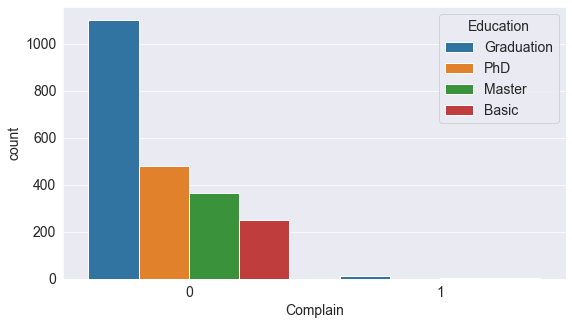

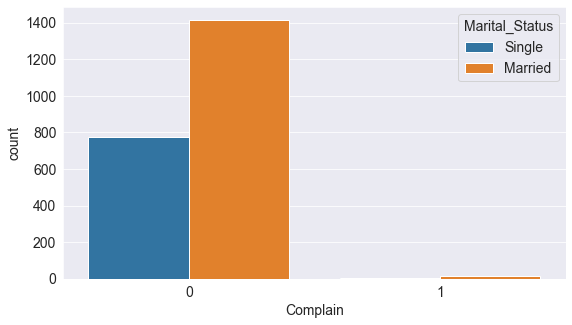

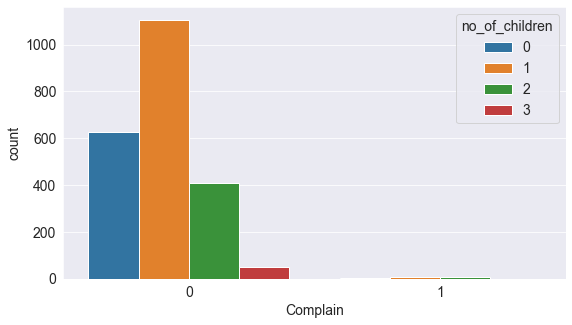

In [32]:
for value in sub_var:
    count_plot("Complain", value)

#### Comment
Since the majority of the customers don't complain, there is no significant analysis for those who complained.
However, base on the few that complained, we observed that complaint are mostly from the graduates, married and those who had children.

<AxesSubplot:xlabel='Complain', ylabel='Age'>

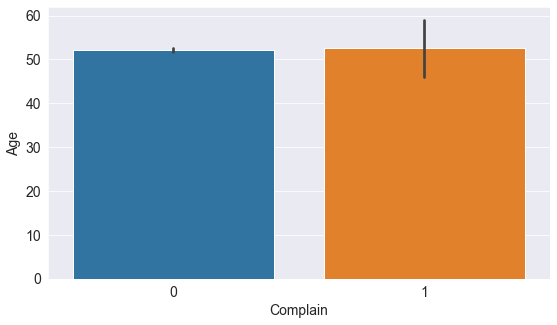

In [33]:
sns.barplot(y= "Age", x = "Complain",data = customer_df)

## Product
3. What are the most purchased goods?
    * How does this relate to customers education level?
    * How does it relate to customers marital status?
    * Also, how does this relate with the no. of children the customer has?

In [34]:
product_var = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]

In [35]:
product_value = customer_df[product_var].sum().sort_values(ascending = False)

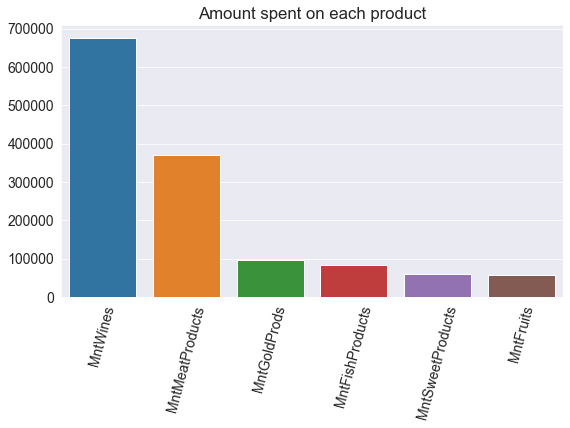

In [36]:
# barplot for amount spent on each  product
sns.barplot(x = product_value.index, y = product_value)
plt.title("Amount spent on each product")
plt.xticks(rotation =75);

### Comment
It is invalid to conclude that the most purchased goods is Wines because the price value for each of these product are not thesame. For instance, one quantity of fruit might be 5 dollars and one quantity of wines might be 250 dollars, also gold will be more expensive. With this illustration, 10 quantity of fruits is not even up to a quantity of wine, having sold one wine and 10 fruits. With the above result, we will conclude that wine is more purchased than fruit which is not true.
The result would have been more realistic if the quantity of goods purchased were given. Then we can use the weighted average.

For the purpose of this analysis, we will conclude that customers spend more on wines than other products (Considering the value of money spent only).

In [37]:
sub_var= ["Education", "Marital_Status","no_of_children"]

In [38]:
def bar_plot(col, var):
    var_plot = customer_df.groupby(col)[var].sum()
    plt.figure(figsize = (10,6))
    var_plot.plot(kind = "bar")
    plt.yticks(fontsize=14)
    plt.title(f'{col} vs Products', fontsize=15);
    plt.tight_layout()

<Figure size 720x432 with 0 Axes>

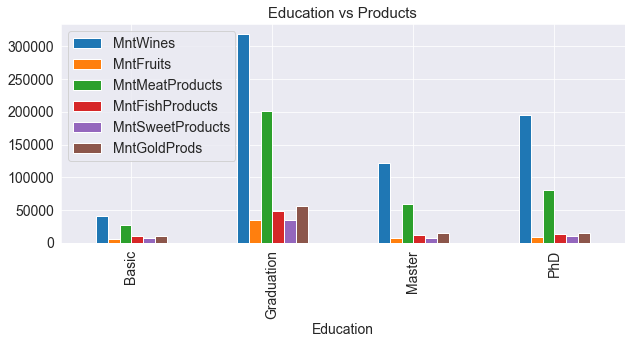

<Figure size 720x432 with 0 Axes>

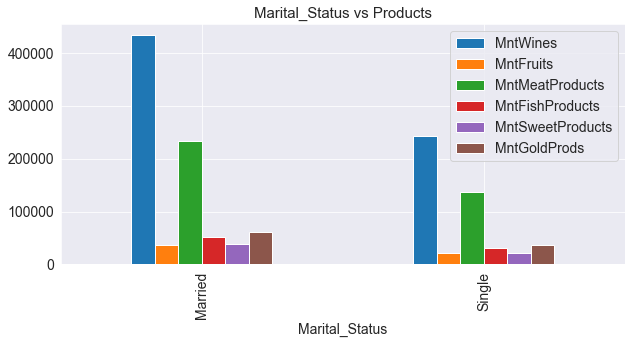

<Figure size 720x432 with 0 Axes>

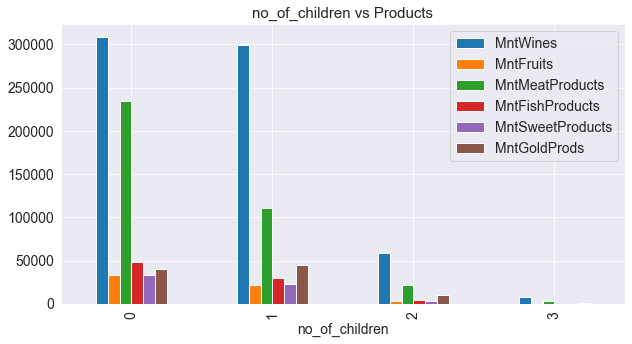

In [39]:
for value in sub_var:
    bar_plot(value, product_var)

#### Comment

Customers spent more on wines in almost all the categories, followed by meat product.

## Place
4. Where do customers prefer most to get their products?
    * How does this relate to customers education level?
    * How does it relate to customers marital status?
    * Also, how does this relate with the no. of children the customer has?

To answer this, we need to know the total number of purchase made through each medium.

In [40]:
medium_var = ["NumWebPurchases", "NumCatalogPurchases","NumStorePurchases"]

In [41]:
medium_value= customer_df[medium_var].sum().sort_values(ascending = False)
medium_value

NumStorePurchases      12844
NumWebPurchases         9043
NumCatalogPurchases     5911
dtype: int64

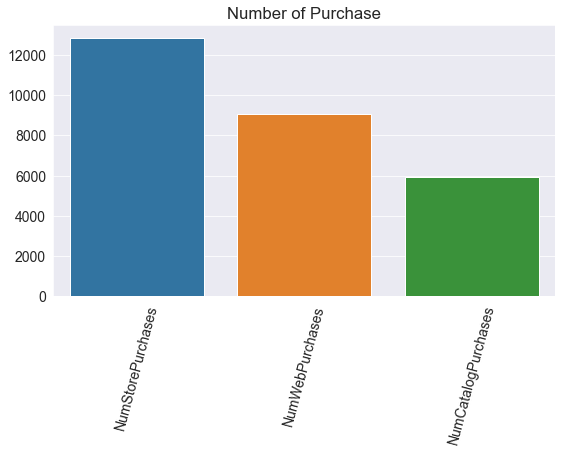

In [42]:
sns.barplot(x = medium_value.index, y = medium_value)
plt.xticks(rotation = 75)
plt.title("Number of Purchase");

<Figure size 720x432 with 0 Axes>

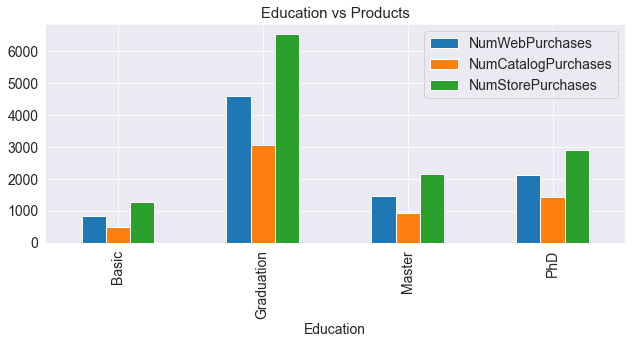

<Figure size 720x432 with 0 Axes>

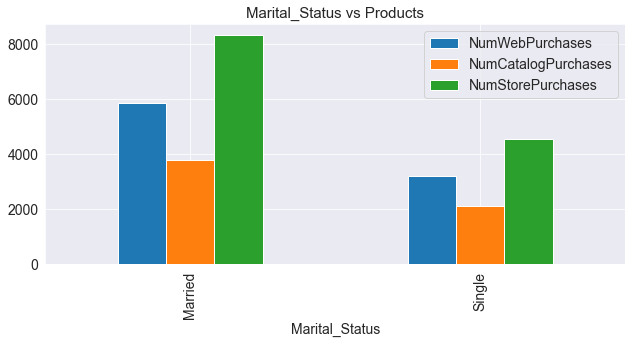

<Figure size 720x432 with 0 Axes>

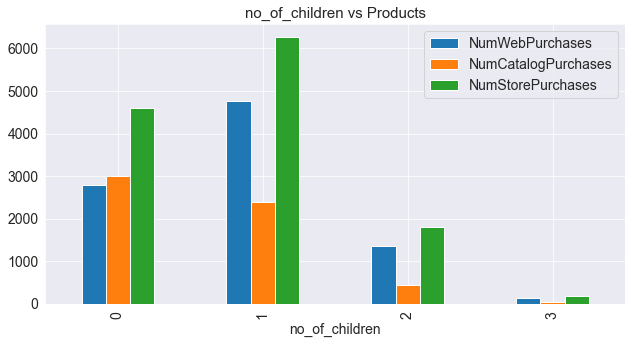

In [43]:
for value in sub_var:
    bar_plot(value, medium_var)

#### Comment

Although, customers purchase more in store in all caegories, followed by web and catalogue purchase. However under number of children category, customers with no child purchase more in store but followed by catalogue and web purchase.

## Promotion
5. Which of the customer category should be the target customer?

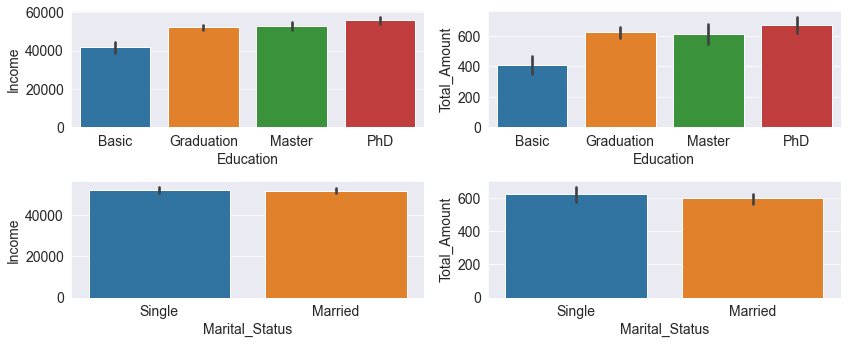

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(12,5))
sns.barplot(data=customer_df, x='Education', y='Income', order = ['Basic', 'Graduation', 'Master', 'PhD'], ax=ax[0,0])
sns.barplot(data=customer_df, x='Education', y='Total_Amount', order = ['Basic', 'Graduation', 'Master', 'PhD'], ax=ax[0,1])
sns.barplot(data=customer_df, x= 'Marital_Status', y='Income', order = ['Single', 'Married'], ax=ax[1,0])
sns.barplot(data=customer_df, x= 'Marital_Status', y='Total_Amount', order = ['Single', 'Married'], ax=ax[1,1])
plt.tight_layout()

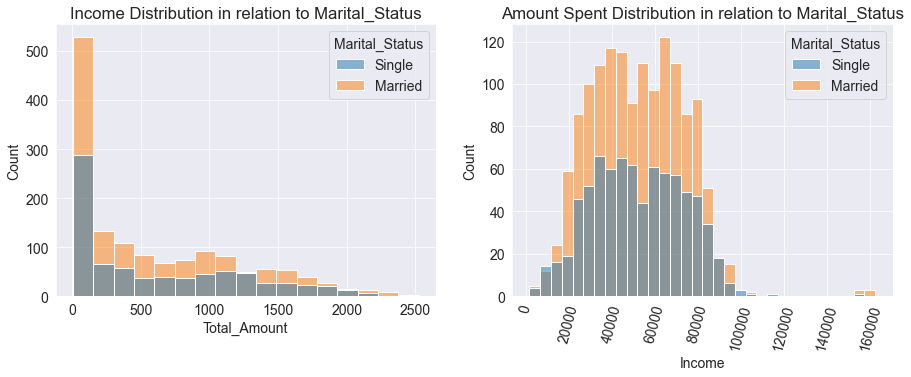

In [45]:
# Plot the Income and amount in relation to marital status frequency distribution
fig, ax = plt.subplots(1, 2, figsize=(15,5))
plt.xticks(rotation = 75)
sns.histplot(data=customer_df, hue='Marital_Status', x='Income', ax=ax[1])
sns.histplot(data=customer_df, hue='Marital_Status', x='Total_Amount', ax=ax[0])
ax[0].set_title("Income Distribution in relation to Marital_Status")
ax[1].set_title("Amount Spent Distribution in relation to Marital_Status")
plt.show()

#### Comment

Ph.D., Master and Graduation levels who are educated are most earners and spenders. Hence, they can be targeted with higher end goods campaigns.

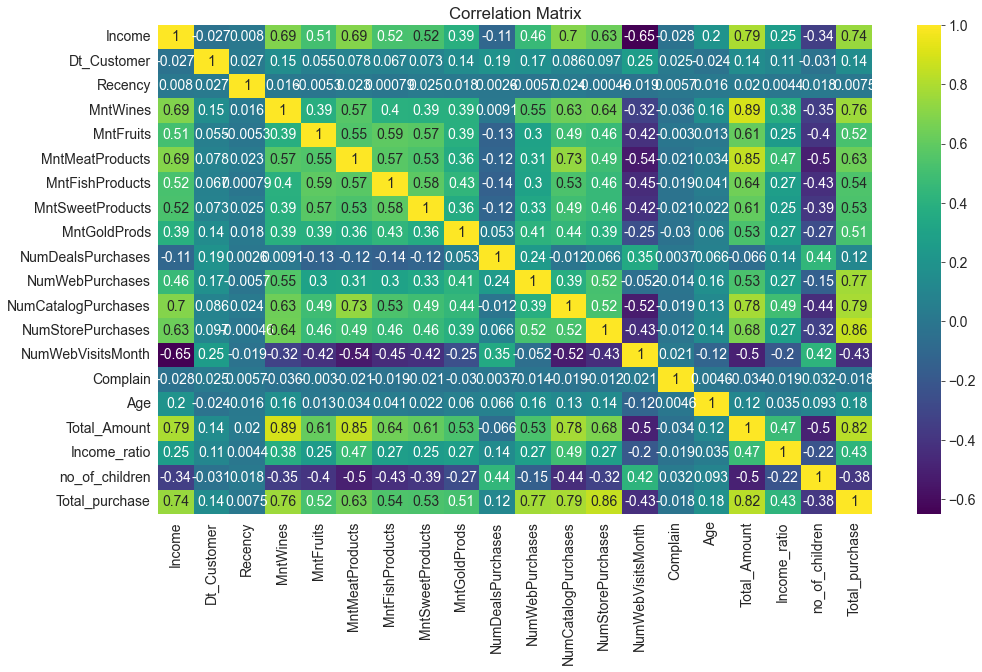

In [46]:
plt.figure(figsize=(16,9))
sns.heatmap(customer_df.corr(), cmap='viridis', annot = True)
plt.title('Correlation Matrix')
plt.show()

# Conclusion

From the results above, we have analyzed the correlation between all variables in the dataset. We observed that there is high correlation between income and total amount spent.
There are also high correlation between income and the following variables:
    * wine
    * meat product
    * catalogue means of purchase
    * Store means of purchase.
Furthermore, there are also high correlation between total amount with the above mentioned variables. More correlations between all variables can be seen in the Correlation matrix figure above.

Hence, the findings shows that educated and married customers earned and spent more. Marketing campaign can be targeted towards these categories.